This notebook performs music genre segmentation on a large Spotify tracks dataset. We first clean and scale key audio features (danceability, energy, tempo, etc.) and apply Principal Component Analysis (PCA) to reduce high-dimensional data into 3 interpretable components that capture most of the variance. We then run K-means clustering (k=4) in this reduced space to group songs into distinct musical clusters. These clusters are profiled based on their average feature values and labeled with fun, interpretable names — Dance Floor 🎉, Chill Zone ☁️, Break-Up Corner 💔, Rap Stage 🔥. Finally, we visualize the results using both Matplotlib (static 3D) and Plotly (interactive 3D), and examine PCA loadings to understand how original features contribute to each principal component.

In [ ]:
#Installing my dependencies

!pip install -q datasets pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
from datasets import load_dataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#Importing packages necessary

In [ ]:
#importing the dataset and creating a dataframe

ds = load_dataset("maharshipandya/spotify-tracks-dataset", split="train")
df = ds.to_pandas()


In [59]:
df.shape  # arround 114 k musicheads 25 attributes

(113999, 26)

In [60]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,track_genre,PC1,PC2,PC3,cluster,cluster_name
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.3580,0.715,87.917,4,acoustic,0.641632,1.022316,0.623221,0,Dance Floor 🎉
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.1010,0.267,77.489,4,acoustic,-3.317625,1.309056,0.411511,1,Chill Zone ☁️
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.1170,0.120,76.332,4,acoustic,-1.386014,-0.164048,-0.135201,1,Chill Zone ☁️
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.1320,0.143,181.740,3,acoustic,-3.375371,-0.331049,0.181523,1,Chill Zone ☁️
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0829,0.167,119.949,4,acoustic,-0.984432,0.301572,-0.447188,1,Chill Zone ☁️


In [ ]:
df.isna().sum()
df.dropna(inplace=True)

In [61]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Choosing numeric features for clustering from the above dataset
features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]
X = df[features]

In [ ]:
#scaling features as clusters may not be well formed if the features are on different scale

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Using Principal component analysis to create 3 principal components as high dimensional data
# i cannot pass variance to be captured in this pca component arg as it can create n number of components and we need 2 for for visualisation
#Dimensionality curse

pca = PCA(n_components=3, random_state=42)
X_pca3 = pca.fit_transform(X_scaled)


In [ ]:
#Lets see how much variance my three components captured  56 percent not bad
pca.explained_variance_ratio_.sum()

In [ ]:
 #Running  K-means with k=4 clusters
 #Please note centroid can be a data point or just the geometric  centre of the cluster
#Default is L2 euclidean distance L2 norm




kmeans = KMeans(n_clusters=4, random_state=42, n_init=20) # 4 clusters ,n_init set to 20 how many times
                                                                        #to restart k means with different centroid seeds

                                                                     # As its sensitive to initialization
labels = kmeans.fit_predict(X_pca3)   # clustering done in full space (better than PCA)




In [ ]:
X_pca3[:,0]

In [65]:
# Attaching  PCA results and cluster labels for plotting

df['PC1'], df['PC2'], df['PC3'] = X_pca3[:,0], X_pca3[:,1], X_pca3[:,2]
df['cluster'] = labels

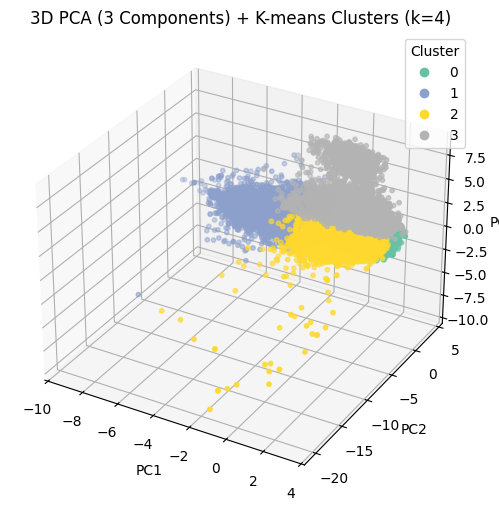

In [66]:
#  3d matplotlib pyplot


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['PC1'], df['PC2'], df['PC3'],
                     c=df['cluster'], cmap='Set2', s=10)
ax.set_title("3D PCA (3 Components) + K-means Clusters (k=4)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


For fun lets create some psuedo labels

Dance Floor 🎉
Chill Zone ☁️
Break-Up Corner 💔
Rap Stage 🔥"



In [ ]:
#creating a dictionary

cluster_names = {
    0: "Dance Floor 🎉",
    1: "Chill Zone ☁️",
    2: "Break-Up Corner 💔",
    3: "Rap Stage 🔥"
}

In [62]:
df['cluster_name'] = df['cluster'].map(cluster_names) # mapping them to labels

In [ ]:
!pip install -q plotly

#importing plotly

import plotly.express as px

# 3D scatter with cluster names as legend from above dict
fig = px.scatter_3d(
    df,
    x='PC1', y='PC2', z='PC3',
    color='cluster_name',  # directly use mapped names
    hover_data=['track_name', 'artists'],  # optional: see song info on hover
    title="3D PCA (3 Components) + K-means Clusters (k=4)"
)

fig.show()

#zoom it its interactive

In [64]:
# checking my  loadings that is contribution of features to PCA

loadings_array = pca.components_.T   # transpose so features = rows, PCs = columns


columns = ["PC1", "PC2", "PC3"]   # since 3 pca 3 columns

loadings = pd.DataFrame(loadings_array, index=features, columns=columns)


print(loadings)

                       PC1       PC2       PC3
danceability      0.246935  0.483671 -0.216965
energy            0.508439 -0.263318  0.037336
loudness          0.516757 -0.077839 -0.039150
speechiness       0.101135  0.091325  0.609101
acousticness     -0.438282  0.315504  0.176570
instrumentalness -0.283430 -0.321240 -0.153502
liveness          0.085003 -0.143957  0.695819
valence           0.296322  0.487668 -0.072575
tempo             0.188653 -0.240314 -0.068893
duration_ms      -0.014182 -0.404097 -0.173430


In [63]:
# i can check which feature dominate which cluster and then see the Plotly space and recomend music

custer_profile = df.groupby("cluster_name")[features].mean()
print(cluster_profile)


                   danceability    energy   loudness  speechiness  \
cluster_name                                                        
Break-Up Corner 💔      0.485846  0.790833  -6.306701     0.068977   
Chill Zone ☁️          0.454003  0.269652 -15.020219     0.050408   
Dance Floor 🎉          0.679680  0.690164  -6.672273     0.079736   
Rap Stage 🔥            0.537096  0.756573  -7.087870     0.244307   

                   acousticness  instrumentalness  liveness   valence  \
cluster_name                                                            
Break-Up Corner 💔      0.080758          0.248691  0.199017  0.327401   
Chill Zone ☁️          0.775826          0.338247  0.163722  0.288262   
Dance Floor 🎉          0.256172          0.031981  0.164237  0.654846   
Rap Stage 🔥            0.331052          0.038793  0.631854  0.497124   

                        tempo    duration_ms  
cluster_name                                  
Break-Up Corner 💔  135.262998  274147.052794  
Chill